In [ ]:
!pip install seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style='whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv
Saving bank-full.csv to bank-full.csv
Saving bank-names.txt to bank-names.txt
Saving bank.csv to bank.csv
Saving bank-additional.csv to bank-additional.csv


In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


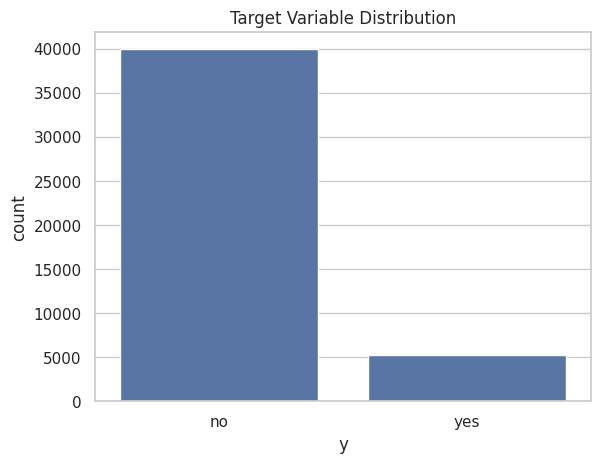

In [ ]:
# Target variable distribution
sns.countplot(data=df, x='y')
plt.title('Target Variable Distribution')
plt.show()

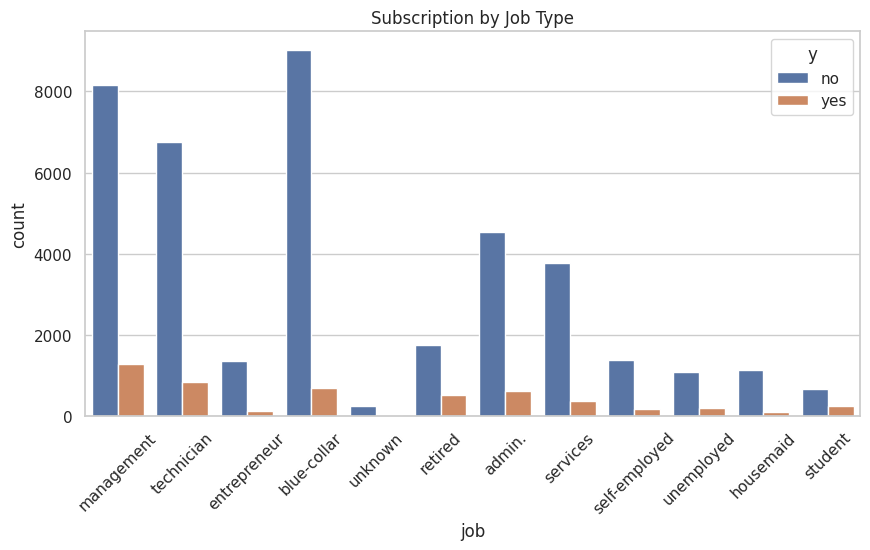

In [ ]:
# See job distribution vs subscription
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Subscription by Job Type')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy of the dataframe
df_encoded = df.copy()

# Encode categorical features
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns.drop('y')

for col in cat_cols:
    df_encoded[col] = le.fit_transform(df[col])

# Encode the target variable
df_encoded['y'] = df['y'].map({'yes': 1, 'no': 0})

# Scale numeric columns
scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Preview the processed data
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[7798  187]
 [ 690  368]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.66      0.35      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043


Accuracy Score: 0.90
